In [1]:
# scvelo virtual environment

import scvelo as scv
import scanpy as sc
import os
import datetime
import random
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adata_split1 = ad.read_h5ad("/home/users/kzlin/kzlinlab/projects/veloUncertainty/out/kevin/Writeup9/Writeup9_unitvelo_larry_shuffle-all_split1.h5ad")
adata_split1

AnnData object with n_obs × n_vars = 49302 × 834
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'n_genes_by_counts', 'total_counts', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'velocity_gamma', 'velocity_r2', 'scaling', 'velocity_genes', 'fit_vars', 'fit_varu', 'fit_gamma', 'fit_beta', 'fit_offset', 'fit_a', 'fit_t', 'fit_h', 'fit_intercept', 'fit_loss', 'fit_llf', 'fit_sr2', 'fit_ur2'
    uns: 'base_function', 'basis', 'datapath', 'label', 'log1p', 'loss', 'neighbors', 'par_names', 'pca', 'temp', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca',

In [3]:
adata_split2 = ad.read_h5ad("/home/users/kzlin/kzlinlab/projects/veloUncertainty/out/kevin/Writeup9/Writeup9_unitvelo_larry_shuffle-all_split2.h5ad")
adata_split2

AnnData object with n_obs × n_vars = 49302 × 837
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'n_genes_by_counts', 'total_counts', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'velocity_gamma', 'velocity_r2', 'scaling', 'velocity_genes', 'fit_vars', 'fit_varu', 'fit_gamma', 'fit_beta', 'fit_offset', 'fit_a', 'fit_t', 'fit_h', 'fit_intercept', 'fit_loss', 'fit_llf', 'fit_sr2', 'fit_ur2'
    uns: 'base_function', 'basis', 'datapath', 'label', 'log1p', 'loss', 'neighbors', 'par_names', 'pca', 'temp', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca',

In [4]:
adata = ad.read_h5ad("/home/users/kzlin/kzlinlab/projects/veloUncertainty/out/kevin/Writeup9/Writeup9_unitvelo_larry_shuffle-all.h5ad")
adata

AnnData object with n_obs × n_vars = 49302 × 1042
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'velocity_gamma', 'velocity_r2', 'scaling', 'velocity_genes', 'fit_vars', 'fit_varu', 'fit_gamma', 'fit_beta', 'fit_offset', 'fit_a', 'fit_t', 'fit_h', 'fit_intercept', 'fit_loss', 'fit_llf', 'fit_sr2', 'fit_ur2'
    uns: 'base_function', 'basis', 'data_des', 'datapath', 'hvg', 'label', 'log1p', 'loss', 'neighbors', 'par_names', 'pca', 'temp', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_clone', 'X_emb', 'X_pca', 'velocity_pca'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'Mu_scale', 'fit_t

In [5]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40) # used to be n_neighbors=10
sc.tl.umap(adata)
scv.tl.velocity_graph(adata)

computing moments based on connectivities
    finished (0:00:05) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocity graph (using 1/20 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:01:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:11) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


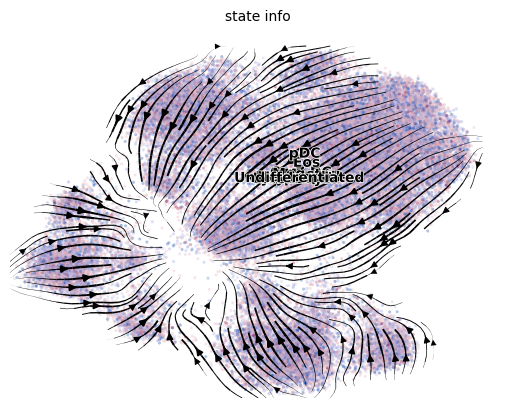

In [6]:
celltype_label = 'state_info'
scv.pl.velocity_embedding_stream(adata, 
                                 basis='umap',
                                 color=celltype_label,
                                 recompute=True)

In [7]:
import sys
sys.path.append('/home/users/kzlin/kzlinlab/projects/veloUncertainty/git/veloUncertainty/veloUncertainty')
from v2_functions import *

In [8]:
method = 'scv'
text_x=None
text_y=None
cos_sim, Ngenes = compute_cosine_similarity(
    adata_split1,
    adata_split2,
    method
)
cos_sim

Number of overlapped genes for velocity computation in splits = 801


array([ 0.9793361 , -0.56088823,  0.9683131 , ..., -0.60428226,
        0.9788898 , -0.87052906], dtype=float32)

Text(0.5, 1.0, 'Histogram of cosine similarity, Ngenes=801')

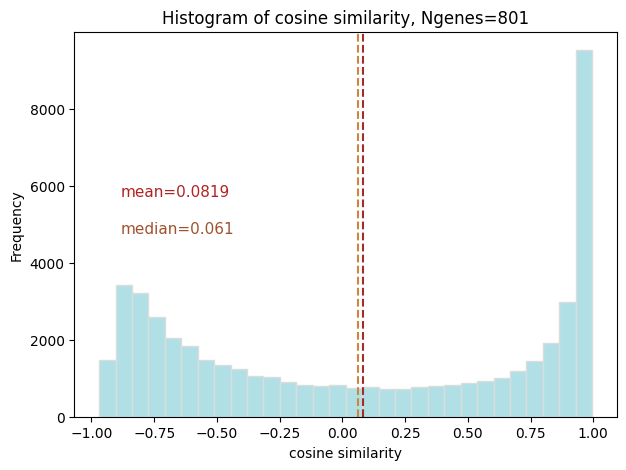

In [9]:
plt.figure(figsize=(7, 5))
counts, bins, patches = plt.hist(cos_sim, bins=30, edgecolor='gainsboro',color='powderblue') 
max_frequency = np.max(counts)
if text_x is None: text_x = np.quantile(cos_sim,[.05])[0]
if text_y is None: text_y = max_frequency/5
plt.axvline(np.mean(cos_sim), color='brown', linestyle='dashed', linewidth=1.5) ## add mean
plt.axvline(np.median(cos_sim), color='peru', linestyle='dashed', linewidth=1.5) ## add median
plt.text(text_x,text_y*3,'mean='+str(np.round(np.mean(cos_sim),4)), color='firebrick', fontsize=11)
plt.text(text_x,text_y*2.5,'median='+str(np.round(np.median(cos_sim),4)), color='sienna', fontsize=11)
plt.xlabel('cosine similarity')
plt.ylabel('Frequency')
plt.title('Histogram of cosine similarity, Ngenes='+str(Ngenes))

In [10]:
adata.obs['cos_sim'] = cos_sim
cos_sim = adata.obs['cos_sim']
latent_time = adata.obs['latent_time']
state_info = adata.obs['state_info']
state_colors = adata.uns['state_info_colors']

state_color_mapping = {state: state_colors[i] for i, state in enumerate(adata.obs['state_info'].unique())}
colors = adata.obs['state_info'].map(state_color_mapping)

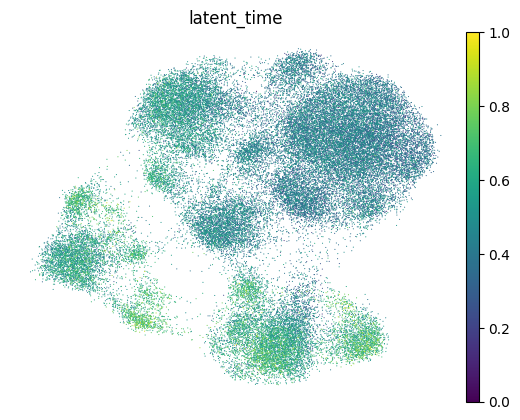

In [11]:
sc.pl.umap(
    adata,
    color="latent_time",
    legend_loc="on data",
    frameon=False,
    legend_fontsize=10,
    legend_fontoutline=2,
)

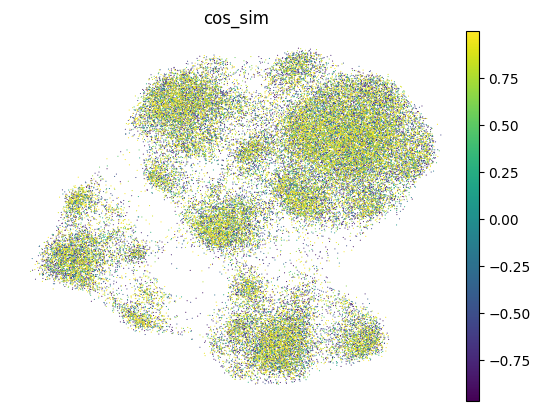

In [12]:
sc.pl.umap(
    adata,
    color="cos_sim",
    legend_loc="on data",
    frameon=False,
    legend_fontsize=10,
    legend_fontoutline=2,
)